In [1]:
from google.colab import files
uploaded = files.upload()

Saving acc_x.csv to acc_x.csv
Saving acc_y.csv to acc_y.csv
Saving acc_z.csv to acc_z.csv


In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

import matplotlib.colors as mcolors

import time

In [4]:
data_x = pd.read_csv('acc_x.csv')
data_y = pd.read_csv('acc_y.csv')
data_z = pd.read_csv('acc_z.csv')

In [5]:
accelometer = pd.DataFrame()
accelometer['x'] = data_x
accelometer['y'] = data_y
accelometer['z'] = data_z

In [6]:
print(accelometer)

              x         y         z
0      0.011905  0.048193  9.804955
1      0.023810  0.048193  9.832613
2      0.023810  0.048193  9.832613
3      0.035714  0.060241  9.860152
4      0.011905  0.048193  9.832732
...         ...       ...       ...
30185 -0.023810 -0.012048  9.833692
30186 -0.023810 -0.012048  9.833692
30187 -0.023810 -0.012048  9.833692
30188 -0.023810 -0.012048  9.833692
30189 -0.023810 -0.048193  9.834053

[30190 rows x 3 columns]


In [12]:
# Defining constants

labels = ['x','y','z']
color_map = ['orange', 'c', 'pink']

number_of_signals = 3;
fs = 512
cut_off = 1
length = 10000

In [13]:
def plot_lines(data, title):

  fig, ax = plt.subplots()

  index = np.arange(length)/fs
  ax.plot(index, data['x'], color_map[0], label = labels[0])
  ax.plot(index, data['y'], color_map[1], label = labels[1])
  ax.plot(index, data['z'], color_map[2], label = labels[2])

  ax.set_xlim([0, length/fs])
  ax.set_ylim([-15, 15])
  ax.set_xlabel('Time [s]')
  ax.set_title(title)
  
  ax.legend()

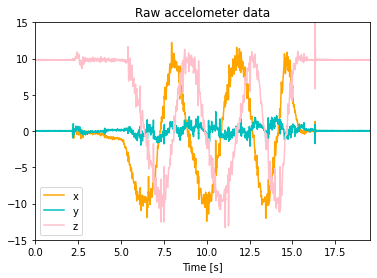

In [14]:
data = accelometer[10000 : 20000]

plot_lines(data, 'Raw accelometer data')

In [15]:
length_singal = 1886

new_x = np.zeros(length_singal)
new_y = np.zeros(length_singal)
new_z = np.zeros(length_singal)
i = 16; 

import time 

t = time.time()
while i<=30182:
  new_x[(i//16)-1] = np.mean(accelometer['x'][i-8:i+8])
  new_y[(i//16)-1] = np.mean(accelometer['y'][i-8:i+8])
  new_z[(i//16)-1] = np.mean(accelometer['z'][i-8:i+8])
  i = i + 16

elapsed = time.time() - t
print(elapsed)

1.4700939655303955


In [16]:
data = np.zeros([length_singal, number_of_signals])
data[:, 0] = new_x
data[:, 1] = new_y
data[:, 2] = new_z

print(data)

[[ 0.0141369   0.04743976  9.83098146]
 [ 0.01116071  0.03840361  9.82589325]
 [ 0.01488095  0.04894578  9.82401451]
 ...
 [-0.02380952 -0.01506024  9.83719425]
 [-0.02157738 -0.02334337  9.83204643]
 [-0.02008929 -0.02108434  9.83200896]]


Text(0.5, 0, 'Time [s]')

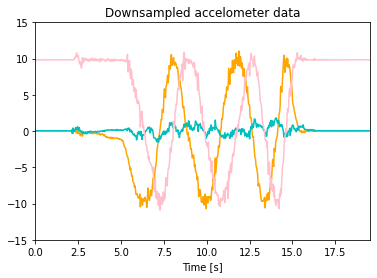

In [17]:
fs = 32
rows_start = 625
rows_end = 1250
cols = 3

fig, ax = plt.subplots()

labels = ['x','y','z']
color_map = ['orange', 'c', 'pink']

index = np.arange(rows_end-rows_start)/fs
ax.plot(index, data[rows_start:rows_end, 0], color_map[0], label = labels[0])
ax.plot(index, data[rows_start:rows_end, 1], color_map[1], label = labels[1])
ax.plot(index, data[rows_start:rows_end, 2], color_map[2], label = labels[2])

ax.set_title("Downsampled accelometer data")
ax.set_xlim([0, (rows_end-rows_start)/fs])
ax.set_ylim([-15, 15])
ax.set_xlabel('Time [s]')